# Text Classification:

## Data
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
5. Below we provided count plot of all the labels in our data. 
</pre>

<IPython.core.display.Javascript object>


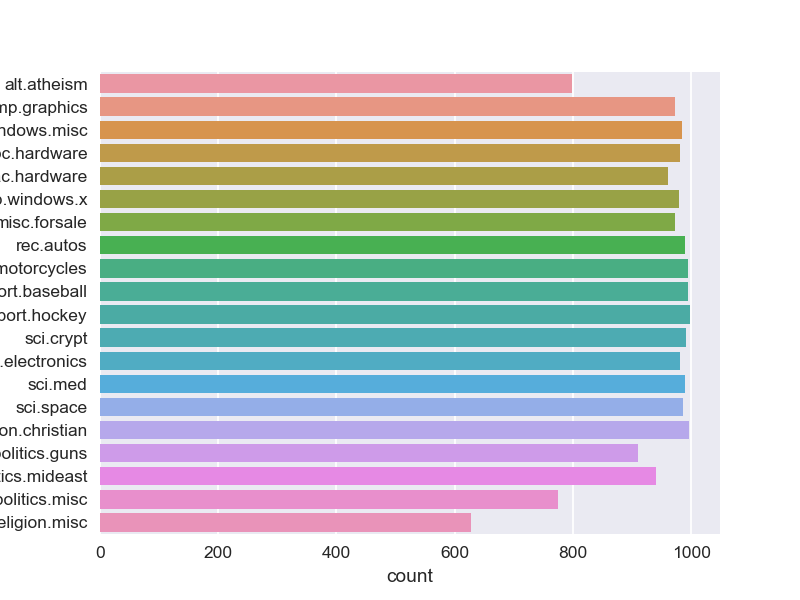

In [ ]:
### count plot of all the class labels. 

## Assignment:

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

### Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

In [ ]:
# we have collected all emails and preprocessed them, this is sample output
preprocessed_email

array(['juliet caltech edu',
       'coding bchs edu newsgate sps mot austlcm sps mot austlcm sps mot com  dna bchs edu',
       'batman bmd trw', ..., 'rbdc wsnc org dscomsa desy zeus  desy',
       'rbdc wsnc org morrow stanford edu pangea Stanford EDU',
       'rbdc wsnc org apollo apollo'], dtype=object)

In [ ]:
len(preprocessed_email)

18828

<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

In [ ]:
#i am living in the New York
print("i am living in the New York -->", list(chunks))
print(" ")
print("-"*50)
print(" ")
#My name is Srikanth Varma
print("My name is Srikanth Varma -->", list(chunks1))

i am living in the New York --> [('i', 'NN'), ('am', 'VBP'), ('living', 'VBG'), ('in', 'IN'), ('the', 'DT'), Tree('GPE', [('New', 'NNP'), ('York', 'NNP')])]
 
--------------------------------------------------
 
My name is Srikanth Varma --> [('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), Tree('PERSON', [('Srikanth', 'NNP'), ('Varma', 'NNP')])]


<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

<pre>
<font color='blue'><b>13.</b></font> Replace all the digits with space i.e delete all the digits. 
> In the above sample document, the 6th line have digit 100, so we have to remove that.

<font color='blue'><b>14.</b></font> After doing above points, we observed there might be few word's like
 <b> "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _)</b> remove the <b>_</b> from these type of words. 

<font color='blue'><b>15.</b></font>  We also observed some words like <b> "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin </b>, in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

<font color='blue'><b>16.</b></font> Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

<font color='blue'><b>17.</b></font> replace all the words except "A-Za-z_" with space. 

<font color='blue'><b>18.</b></font> Now You got Preprocessed Text, email, subject. create a dataframe with those. 
Below are the columns of the df. 
</pre>

In [ ]:
data.columns

Index(['text', 'class', 'preprocessed_text', 'preprocessed_subject',
       'preprocessed_emails'],
      dtype='object')


In [ ]:
data.iloc[400]

text                    From: arc1@ukc.ac.uk (Tony Curtis)\r\r\r\nSubj...
class                                                         alt.atheism
preprocessed_text       said re is article if followed the quoting rig...
preprocessed_subject                                christian morality is
preprocessed_emails                                   ukc mac macalstr edu
Name: 567, dtype: object


### To get above mentioned data frame --> Try to Write Total Preprocessing steps in One Function Named Preprocess as below.

> Indented block



In [ ]:
def preprocess(Input_Text):
    """Do all the Preprocessing as shown above and
    return a tuple contain preprocess_email,preprocess_subject,preprocess_text for that Text_data"""
    return (list_of_preproessed_emails,subject,text)

### Code checking:

<font color='red' size=4>
After Writing preprocess function. call that functoin with the input text of 'alt.atheism_49960' doc and print the output of the preprocess function
<br>
This will help us to evaluate faster, based on the output we can suggest you if there are any changes.
</font>

### After writing Preprocess function, call the function for each of the document(18828 docs) and then create a dataframe as mentioned above.

### Training The models to Classify: 

<pre>
1. Combine "preprocessed_text", "preprocessed_subject", "preprocessed_emails" into one column. use that column to model. 

2. Now Split the data into Train and test. use 25% for test also do a stratify split. 

3. Analyze your text data and pad the sequnce if required. 
Sequnce length is not restricted, you can use anything of your choice. 
you need to give the reasoning

4. Do Tokenizer i.e convert text into numbers. please be careful while doing it. 
if you are using tf.keras "Tokenizer" API, it removes the <b>"_"</b>, but we need that.

5. code the model's ( Model-1, Model-2 ) as discussed below 
and try to optimize that models.  

6. For every model use predefined Glove vectors. 
<b>Don't train any word vectors while Training the model.</b>

7. Use "categorical_crossentropy" as Loss. 

8. Use <b>Accuracy and Micro Avgeraged F1 score</b> as your as Key metrics to evaluate your model. 

9.  Use Tensorboard to plot the loss and Metrics based on the epoches.

10. Please save your best model weights in to <b>'best_model_L.h5' ( L = 1 or 2 )</b>. 

11. You are free to choose any Activation function, learning rate, optimizer.
But have to use the same architecture which we are giving below.

12. You can add some layer to our architecture but you <b>deletion</b> of layer is not acceptable.

13. Try to use <b>Early Stopping</b> technique or any of the callback techniques that you did in the previous assignments.

14. For Every model save your model to image ( Plot the model) with shapes 
and inlcude those images in the notebook markdown cell, 
upload those imgages to Classroom. You can use "plot_model" 
please refer <a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>this</a> if you don't know how to plot the model with shapes. 

</pre>

### Model-1: Using 1D convolutions with word embeddings

<pre>
<b>Encoding of the Text </b> --> For a given text data create a Matrix with Embedding layer as shown Below. 
In the example we have considered d = 5, but in this assignment we will get d = dimension of Word vectors we are using.
 i.e if we have maximum of 350 words in a sentence and embedding of 300 dim word vector, 
 we result in 350*300 dimensional matrix for each sentance as output after embedding layer
<img src='https://i.imgur.com/kiVQuk1.png'>


<b>Reference:</b>
<a href='https://stackoverflow.com/a/43399308/4084039'>https://stackoverflow.com/a/43399308/4084039</a>

<b><a href='https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work'>How EMBEDDING LAYER WORKS </a></b>

</pre>

### Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

<img src='https://i.imgur.com/fv1GvFJ.png'>
ref: 'https://i.imgur.com/fv1GvFJ.png'

<pre>
1. all are Conv1D layers with any number of filter and filter sizes, there is no restriction on this.

2. use concatenate layer is to concatenate all the filters/channels. 

3. You can use any pool size and stride for maxpooling layer.

4. Don't use more than 16 filters in one Conv layer becuase it will increase the no of params. 
( Only recommendation if you have less computing power )

5. You can use any number of layers after the Flatten Layer.
</pre>

### #

### preprocessing

In [ ]:
import os
import pandas as pd
from tqdm import tqdm
import re
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#tf.keras.layers.Embedding
import numpy as np
import random as rn
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Embedding, Input , Conv1D ,concatenate , MaxPooling1D
from tensorflow.keras.layers import Flatten,Dropout,Dense
from tensorflow.keras.models import Model

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree
import nltk
#nltk.download("popular")
#nltk.download()
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
#nltk.download('punkt')

In [ ]:
#!unrar
# /content/drive/My Drive/Colab Notebooks/22_CNN/data/documents.rar
#source_file = "/content/drive/My Drive/Colab Notebooks/22_CNN/data/documents.rar"
#dest_path = "/content/drive/My Drive/Colab Notebooks/22_CNN/data/Document_s/"

# !unrar e -r "/content/drive/My Drive/Colab Notebooks/22_CNN/data/documents.rar"  "/content/drive/My Drive/Colab Notebooks/22_CNN/data/Document_s/"


In [ ]:
data_dir_path = "/content/drive/My Drive/Colab Notebooks/22_CNN/data"

In [ ]:

for i in tqdm( os.listdir( data_dir_path )) :
     if (os.path.isdir(os.path.join( data_dir_path ,i))) :
      #print("\n No of file in ",i," category is ",len(os.listdir(os.path.join( data_dir_path ,i))))
      #pass 

In [ ]:
#for i in os.listdir( data_dir_path ):
files_name_list = []
if (os.path.isdir(os.path.join( data_dir_path , 'Document_s' ))) :
  for file_name in os.listdir(os.path.join( data_dir_path , 'Document_s' )) :
      files_name_list.append( file_name.split('_')[0] )

In [ ]:
len(files_name_list), files_name_list[0:5]

(18828,
 ['talk.politics.misc',
  'talk.politics.misc',
  'talk.politics.misc',
  'talk.politics.misc',
  'talk.politics.misc'])

In [ ]:
file_category = set( files_name_list )
len( file_category )

20

In [ ]:
category_to_index = dict((name, index) for index,name in enumerate( file_category ))
print( category_to_index )

{'comp.graphics': 0, 'comp.windows.x': 1, 'sci.med': 2, 'rec.autos': 3, 'comp.sys.mac.hardware': 4, 'rec.sport.baseball': 5, 'alt.atheism': 6, 'soc.religion.christian': 7, 'talk.politics.guns': 8, 'talk.politics.mideast': 9, 'sci.space': 10, 'sci.crypt': 11, 'comp.os.ms-windows.misc': 12, 'sci.electronics': 13, 'talk.religion.misc': 14, 'rec.motorcycles': 15, 'rec.sport.hockey': 16, 'talk.politics.misc': 17, 'misc.forsale': 18, 'comp.sys.ibm.pc.hardware': 19}


In [ ]:
# y = [category_to_index[files_name] for files_name in files_name_list]

In [ ]:
#len(y) , y[1000:1010]

In [ ]:
def read_file_data_backup():
  #files = os.listdir('byteFiles')
  #filenames=[]
  #array=[]
  document_data_list = []
  f_count=0
  for file_ in os.listdir(os.path.join( data_dir_path , 'Document_s' )) :
      '''if (file_.endswith("txt")) :
          
          file_data = []
          with open( data_dir_path +'/Document_s/' + file_ ,"r",encoding="utf-8" , errors='ignore') as fp :
              lines=""
              #print( fp.readline())
              #for line in fp :
              #  print(line)
              #    file_data.append(line)
              #    #text_file.write(b)
              fp.close()
          print( file_data )
      '''
      file1 = open( data_dir_path +'/Document_s/' + file_ ,'r'  , errors='ignore' ) 
      #print("Output of  " + file_ )
      for line in file1 :
        #print(line)
        #break
        #print( )
        l=1
        
      file1.close()
      f_count +=1
      #break
  print(f_count)
#read_file_data_backup()

In [ ]:
def read_file_data(start_doc , end_doc ):
  #files = os.listdir('byteFiles')
  #filenames=[]
  #array=[]
  data_dir_path = "/content/drive/My Drive/Colab Notebooks/22_CNN/data"

  category_class = []
  processed_email = []
  processed_subject = []
  processed_text = []
  f_count=0 
  for file_nm in tqdm( os.listdir(os.path.join( data_dir_path , 'Document_s' ))[ start_doc: end_doc ] ) :
      #print( file_nm )
      #no_of_lines = 0
      email_id_list = ''
      subject_line_list = ''
      text_line_list = ''

      file_po = open( data_dir_path +'/Document_s/' + file_nm ,'r'  , errors='ignore' )
      for line in file_po :
          #print(line)
          #email_list
          email_ids = email_process( line )
          if ( email_ids != None ) :
            email_id_list = email_id_list + email_ids 
          #subject_line_list
          subject_line = subject_process( line )
          if ( subject_line != None ):
            subject_line_list = subject_line_list + subject_line
          
          #text_line
          text_line = text_process( line )
          if ( text_line != None ):
            text_line_list = text_line_list + text_line

          #no_of_lines = no_of_lines + 1
      
      #print("no_of_lines= " , no_of_lines )
      #print(email_id_list)
      #print( subject_line_list )
      #print( text_line_list )
      processed_email.append( email_id_list )
      processed_subject.append( subject_line_list )
      processed_text.append( text_line_list )
      category_class.append( str( file_nm ).split("_")[0] )

      file_po.close()
      f_count +=1
      #break
  print(f_count)
  return processed_email , processed_subject , processed_text , category_class

#processed_email , processed_subject = read_file_data(0,50)



In [ ]:
processed_email , processed_subject

In [ ]:
#email_str = 'test@dm1.d.com' #'jcopelan@nyx.cs.du.edu' #'mangoe@cs.umd.edu'
#email_str = 'jcopelan@nyx.cs.du.edu'
'''
def get_all_email_ids( MyString1 ):
    mail_id = None
    if re.search( 'From:', MyString1 ):
      mail_id = MyString1.split('<')[1].split('>')[0]
      #print( mail_id.split('@') )
      #print( mail_id )

    return mail_id
'''

def get_email_domain_list( email_str ):
    #mail_id = email_str.split("@")[0]
    #print( mail_id )
    mail_domain = email_str.split("@")[1].split(".")
    #print(  mail_domain )
    domain_arr = ''
    for domain in mail_domain :
      #print(len(domain))
      if ( len(domain) > 2 and domain.lower() !='com'):
        #print( domain )
        #domain_list.append( domain )
        domain_arr = domain_arr + domain + ' '
    #print( domain_arr )  # .strip()
    return domain_arr


def email_process( line ):
  email_id = None
  if re.search( 'From:', line ):
    word_list = line.split(" ")
    #print(word_list)
    for each_word in word_list:
      if re.search( '@', each_word ):
        email_id = each_word
  
  #print("pattern :-->")
  #print( re.search('(<)?(\w+@\w+(?:\.\w+)+)(?(1)>)', line) )
  #email_regex = re.compile(r'(<)?(\w+@\w+(?:\.\w+)+)(?(1)>)')
  #email_regex = re.compile(r'^[a-zA-Z0-9]+[_.-]*@[a-zA-Z0-9.-]+$')
  #email_regex = re.compile(r'\b[A-Z0-9._-]+@[A-Z0-9]+\.[A-Z]+\b')
  #email_regex = re.compile(r'^(?=.{1,64}@)[A-Za-z0-9_-]+(\\.[A-Za-z0-9_-]+)*@[^-][A-Za-z0-9-]+(\\.[A-Za-z0-9-]+)*(\\.[A-Za-z]{2,})$')
  
  #grp = email_regex.findall( line )
  #print( grp )

  if ( email_id !=None ):
    #print(email_id)
    email_id = get_email_domain_list(email_id)
    email_id = email_id.lower()
    #print(email_id)
  return email_id



In [ ]:

#MyString1 =  "Subject: Alt.Atheism FAQ Atheist Subject Resources" + " From: mathew <mathew@mantis.co.uk>"
#MyString2 ="Subject:"
'''
def find_remove_word(MyString2, MyString1 ):
    if re.search( MyString2, MyString1 ):
      #print( re.search( MyString2, MyString1 ) )
      without_sub = MyString1.split( MyString2 )
      #print(without_sub)
      subject_line = ''
      for word in without_sub :
          subject_line = subject_line + word
      #print( subject_line )
      return subject_line
'''

def subject_process( line ):
  sent = None
  if re.search( 'Subject:' , line ):
    sent = line.replace('\r', ' ')
    sent = sent.replace('\n', ' ')
    sent = sent.replace('\t', ' ')
    sent = sent.replace('\"', ' ')
    #print( sent )
    #remove_word_before_colon
    colon_word_regex = re.compile(r'([a-zA-Z0-9]*\:)')  # (<)?(\w+@\w+(?:\.\w+)+)(?(1)>)
    grp = colon_word_regex.sub( '' ,sent )
    sent = grp.strip()

    remove_tag_regex = re.compile(r'<[^>]+>')
    sent = remove_tag_regex.sub( ' ' , sent )

    remove_brace_regex = re.compile(r'\([^\)]+\)')
    sent = remove_brace_regex.sub( ' ' , sent )

    #remove special char
    sp_char_regex = re.compile(r'[^a-zA-Z0-9\)\(]')
    sent = sp_char_regex.sub( ' ' , sent )

    remove_digit_regex = re.compile(r'[0-9]+')
    sent = remove_digit_regex.sub( ' ' , sent )

    sent = sent.split(" ")
    processed_text = ''
    for word in sent :
      if ( len(word) > 2 and len(word) < 15):
        processed_text = processed_text + word + ' '
    
    sent = processed_text.lower()

    #print( sent )
  return sent
#
#processed_email , processed_subject , processed_text = read_file_data(50 , 70)


def chunking_on_text( taxt ):
  #taxt = 'phil netcom com what will you for religion now that marxism leninism dead who said was dead seems alive and well here the net mob rule not any prettier merely because the mob calls itself government not charity you are using someone else money wilson theory you back far enough are all related mark wilson atlantaga ncr com '
  #taxt = processed_text[0] + processed_text[1] + processed_text[2]
  for sent in nltk.sent_tokenize( taxt ):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
        if hasattr(chunk, 'label'):
          print(chunk.label(), ' '.join(c[0] for c in chunk))
          pass


def get_continuous_chunks_1(text):
     print( len( text.split(" ")) )
     chunked = nltk.ne_chunk( pos_tag(word_tokenize(text)))
     #continuous_chunk = []
     continuous_sent = ""
     #current_chunk = []
     for i in chunked:
            curr_word = ""
            if type(i) == Tree:
                    #print("Tree")
                    #print( i.label() )
                    if (i.label() != "PERSON"):
                        #print( i  )
                        curr_word = "_".join([token for token, pos in i.leaves()])
                        #print( curr_word  )
                        continuous_sent = continuous_sent + " " + curr_word
                        #current_chunk.append(" ".join([token for token, pos in i.leaves()]))
                    """ if current_chunk:
                            named_entity = " ".join(current_chunk)
                            if named_entity not in continuous_chunk:
                                    continuous_chunk.append(named_entity)
                                    current_chunk = [] 
                    """
            else :
                    curr_word = i[0]
                    continuous_sent = continuous_sent + " " + curr_word
                    #print( i[0] )
                    #continue
            #continuous_sent.join( [" "] )
            #continuous_sent.join( [curr_word] )
            

     continuous_sent = continuous_sent.strip()
     print( len( continuous_sent.split(" ")) )   
     return continuous_sent

def get_continuous_chunks(text):
     #print( len( text.split(" ")) )
     chunked = nltk.ne_chunk( pos_tag(word_tokenize(text)))
     continuous_sent = ""
     for i in chunked:
            curr_word = ""
            if type(i) == Tree:
                    #print( i )
                    if (i.label() != "PERSON"):
                        curr_word = "_".join([token for token, pos in i.leaves()])
                        continuous_sent = continuous_sent + " " + curr_word
                        #print(curr_word )
            else :
                    curr_word = i[0]
                    continuous_sent = continuous_sent + " " + curr_word

     continuous_sent = continuous_sent.strip()
     #print( len( continuous_sent.split(" ")) )   
     return continuous_sent

#chunking_on_text( taxt1 )
#print( taxt1 )
#print( get_continuous_chunks( taxt1 ) )


In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
# test data
#taxt = processed_text[0] +  processed_text[1] +  processed_text[2]
taxt = ['phil netcom com what will you for religion now that marxism leninism dead who said was dead seems alive and well here the net mob rule not any prettier merely because the mob calls itself government not charity you are using someone else money wilson theory you back far enough are all related mark wilson atlantaga ncr com ',
        'article cdm pmafire inel gov dale cook article rscharfy magnus acs ohio state edu article steveth netcom com just try justify the war drugs dare you friend mine who smoke pot every day and last tuesday took hits acid still having trouble aiming for the bowl when takes dump not how just have seen the results boy really wish cut the drug war and have more people screwed the head sorry about your friend really but this anecdote does nothing justify the war drugs anything demonstrates that the war miserable failure what demonstrates that people will take drugs they want legal not perhaps your friend were taking legal regulated drugs under doctors supervision might not the position now agree with you way the war drugs has failed but opinion that does not mean have give only change the tactics for instance here are how some penalties should changed dealing coke death dealing heroin death dealing pot death dealing crack death the list goes and just kidding however more serious note believe that should take some money away from the foriegn operations south america and costly border interdiction efforts not think going say spend educate people because know plenty educated dopers actually spend things like drug treatment programs saw interesting story minutes about how the british actually prescribe and addict his recommended dosage and try ween him off from cut the amount down levels where acceptable sounds good far from what heard with decrease cost lower addiction rates wiping out the dealer markets etc however legalizing and just sticking some drugs gas stations bought like cigarettes just plain silly plus have never heard recommended dosage for drugs like crack ecstasy chrystal meth and lsd the minute report said worked with cocaine cigarettes pot and heroin ryan ',
        'bross sandbanks cosc brocku the world the future bill clinton will appoint canadians govern all american institutions starting with the american health care system will benevolent canadian dictators with yet another tax being floated the clinton administration pay for new free social programs have really begun suspect that the canadians long resentful their place the american shadow brainwashed american draft dodger who fled canada some time between and tutored him the ways canadian socialism awarded him with smokeless marijuana cigarettes when got the correct answers then returned him the states under the control the domineering wife assigned his case attain high public office and destroy the evil and free market forces america thus shaping america the canadian image steven smith ',
        'article turmoil halcyon com goykhman apollo com article temple edu yes have heard that the survivors are now saying that have also seen the videotape which shows that the fire started two three different places which were not near the tank have not seen the tape cnn which network did you see saw the film cnn happend was clear from that tape that the fire started one location right where the tank was attacking and then had pulled back this not true the cnn pictures show two sites clearly and third barely distinguished you have tape you should note that there are two towers either end the building big one and little one what appears merely long shot the big tower with the tank front fact the little tower you can tell beacuse the flag the foreground switches sides from the right the picture the left the third site visible the flames clearly come from point obscured the small tower you need tape and good slow motion video see this phill hallam baker ',
        'pxgt ubvmsb buffalo edu gld cunixb columbia edu writes pxgt ubvmsb buffalo edu gld cunixb columbia edu writes okay but doctors willingly testify against each other malpractice cases when they court obviously absolutely essential prove malpractice used impossible get doctors here that possible advantage the system you will not hear about from the ama our doctors monopoly exactly the same the not more powerful now that they can dictate insurance payment rates but not know answer this one anecdotally friends who are talk about how hard turn state witness against someone else direct experience there though also some circumstances you may have sue the insurance plan people here after all sue health insurance companies all the time heard about guy alberta who came down with some rare eye disease that had take repeated trips seattle get treated cost him and his family something like and the province years later still has only reimbursed them for well what american private insurance plans cover travel expenses since our public insurance plans are publicly accountable one can raise stink the media try and extort benefits beyond which one entitled lived cheyenne his private insurance would have told him hell for the travel expenses and that that hmo would have just kept quiet and let him blind well yeah tell about the national defense medical centre outside ottawa serves the same purpose the bethesda naval hospital since not all hospitals can provide everything maybe they have some stuff that others not ottawa population only quarter million you include the surrounding counties point was that something that should necessarily remain unpoliticized has become very politicized the detriment its mission not think that this has been shown with the dmc the problem system where hospitals annual budgets are approved the government how you keep political considerations out medical decisions bet that you are mpp good friends with one you are put any hospital urgent care list matter how minor your problem which unless you are someone who gets bumped off the list for some bigshot people influence will get their way any system american european the golden rule who has the gold makes the rules but what extent does affect the system and why urgent care list necessary the first place worth thinking about regular practice hospital figure out who needs get what facilities not americans have arrange advance for operations too think that there are two standards being applied here and that canada can not give beverly hills style treatment everybody not big brother list more like calling around town for table for dinner yeah but private nonprofit foundations have make money somehow especially the hospital business yes and the tories ottawa are trying make them that rather than hope for bigger grant from the feds and their province the next time around whether using mop couple weeks longer even selling services americans remember our system cash based and since our health care infrastructure overbuilt except specialties that require larger populations generate business why not the alternative closing unused wards business whether canadians would thrilled the prospect their own health services catering toward americans who would willing pay more than they another issue entirely must noted that they said they were doing partly because their grants from the province were getting smaller those grants are insubstantial why the need attract foreigners make the difference you answered the question yourself private nonprofit foundations have make money somehow and think that about time that they acted like the private hospitals that they are personally fed with canadian socialists trying tell everyone that their health care free when are actually buying insurance the gdp figures are combined public and private expenditures for total outlay and are compiled use the same methods the oecd that yield the figure for the but not the figures include dentistry and optometry where the canadian one did not since have always been evaluated oecd style not see how remember oecd counts both private and public funds and canada like france and germany health care spending private funds what happens the health care systems financially collapse how they are collecting premiums and advocate having copayments like the french their system well you spend more than you take you bankrupt that simple the provincial insurance systems find themselves paying out more than they get revenue they will not able pay for everybody primary care yes the infrastructure will there but will everybody able continue using the same rate minor copayments can flush out abusers remember that our system only insurance policy but our costs are not rising fast enough ensure adequate copayments deductibles last year quebec user fee proposal came out with the number the necessary hike that could done through copayment rather than give the qma raise and not contract time yet far can tell from upi clarinet even the new reform party breakoff from the conservatives with mildly libertarian faction holds our public health insurance untouchable but that just few people have reminded that not free the average canadian european more fiscally naive than their american counterparts issues like these but mention copayments anywhere seen but cutting public spending all over the place and bringing back the death penalty with little haste elected know that for pete sake live right the border know the canadian system not socialized medicine sorry just that even run into people from buffalo and from michigan who not know the point that means that the money runs low the plan you are out luck unless you can afford yourself yeah but there would lot lead time and health care crisis that would preclude provincial governments bad some them are heck have the ndp cleaning spending mess made the conservatives saskatchewan embarassing can irresponsible there still reallocation health insurance important that about the only thing that can inspire open rebellion and violent insurrection outside the hockey rink right now attempts get the system and its users learn good habits are being treated like cod liver oil would the private insurers take the slack they would under obligation course they could eventually make money again but what you say true they would loathe and out practice handling such basic services too some the companies providing extra insurance are subsidiaries american companies and their parents provide full insurance down here regardless all firms north can easily turn cable see how well the american firms are doing being involved basic coverage the private firms are making too much money after having gotten rid basic coverage they run around patting them selves the back for their own cooperation providing extras for those people who deserve yeah but eventually going create kind two tiered effect that will noticeable after while like britain most americans are fearful single tier system seriously there are few areas that have sufficient population for two more tiered system like what the french have health policy prof shea has cited studies the nejm that indicate having population necessary for adequate competition and canada there are only four cities west the great lakes with that population larger anyways the numbers show that costs have held steadier than those the and barring any future chernobyl like crisis sudden transients spending are unlikely fact the health allocation one the most well behaved sectors spending north any talk bankruptcy talk radio fodder far away from the border the provinces hit fiscal rough spots and have cut back the things private insurers have offer will seem less and less like luxuries and the gap will more and more noticeable this will not overnight and something like this would force canada have system more like the french one but that not bad thing and the change will minimal add copayments and frustrate the socialists chanting hey free gld souviens gary dare gld columbia edu winnipeg jets gld cunixc bitnet selanne domi stanley ',
        'article kaldis romulus rutgers edu article lfoard hopper virginia edu what this bolsters the contention that many homosexuals are liars this study proved wrong then proves that heterosexuals are liars unlike the propaganda spouted the far right the ten percent figure was backed the best study available the time its hardly certain that this new study correct since has not even been out for enough time for any double checking happen the alan guttmacher institute btw funded planned parenthood hardly qualifies bastion conservatism family values course they had found then would invalid because was funded planned parenthood will interesting see the reaction when million queers gather washington after all there are only million then this event unprecidented history this preassumes that million queers will show april there will not anywhere near that many ahead make day promote that number that way will surely much greater embarrassment and slap the face homosexual activists when the crowds are much smaller even its only one million the point still stands even getting given population one place would unprecidented even million show will raise serious doubts about this study indicate resolve unprecidented human history btw have you noticed that even slick willie not going town that day not the target the march nor presidents often speak civil rights marchs however the republicans and conservative democrats would well take notice join the pythagorean reform church repent your evil irrational numbers and bean eating ways accept into your heart call the pythagorean reform church bbs the above smacks antihispanic bigotry this quite amusing obviously you know nothing about the history math join the pythagorean reform church repent your evil irrational numbers and bean eating ways accept into your heart call the pythagorean reform church bbs ',
        'article mcgoy unicorn acs ttu edu the question think then the general public need the train certainly not nor will ever need this train lubbock texas with the inexpensive air travel provided between dallas and houston not think people dallas houston need either totally agree really the only people this going benefit are those who live the cities where the train stops who wants drive the train station from probably farther drive the train station than the nearest national airport really can not see spending billion system that only three cities will benefit from ',
        'clayton cramer compared the table have already posted from masters johnson and kolodny showing male homosexual partners apparent that homosexual men are dramatically more promiscuous than the general male population did you ever consider the selection effect that those who are willing admit being member sexual minority are more willing admit being member another sexual minority highly promiscious did not think that you did greg hennessy university virginia usps astronomy department usa gsh virginia edu uunet virginia gsh ',
        'article pxgt ubvmsb buffalo edu article gld cunixb columbia edu writes the difference the litigation environment reflected the fees lack defensive medicine and near absence malpractice really why spend less using the most expensive approach pure insurance then why really need national health insurance then would not just make more sense find some way cut down the cost malpractice insurance would malpractice and defensive medicine were the main factors explaining spiralling health care costs but they are not although gary correct noting that malpractice related problems are greater the than canada they means account for the overall difference health care costs they account for somewhat larger portion the difference physicians gross income the two countries some facts malpractice insurance and awards account for less than total health care costs the according survey physicians conducted national medical journal physicians averaged paying their practice receipts malpractice insurance malpractice insurance premiums and malpractice awards peaked they have declined significantly since then the same time health care costs have increased more than any period history far defensive medicine concerned the ama estimates that its total impact about billion per year that about the total current increase health care costs and the estimate from group that could expected overestimate the impacts defensive medicine health care small problem this the overall scheme things however clinton has been record for long time favoring against malpractice suits they follow procedures set their specialties this would eliminate most not all frivolous suits while retaining the ability sue for true malpractice jsh steve hendricks steveh thor isc com one thing about data sure does cut uunet isc thor steveh the bulls hofferbert ',
        'article']

#taxt = 'phil netcom com what will you for religion now that marxism leninism dead who said was dead seems alive and well here the net mob rule not any prettier merely because the mob calls itself government not charity you are using someone else money wilson theory you back far enough are all related mark wilson atlantaga ncr com '
taxt2 = 'pxgt ubvmsb buffalo edu gld cunixb columbia edu writes pxgt ubvmsb buffalo edu gld cunixb columbia edu writes okay but doctors willingly testify against each other malpractice cases when they court obviously absolutely essential prove malpractice used impossible get doctors here that possible advantage the system you will not hear about from the ama our doctors monopoly exactly the same the not more powerful now that they can dictate insurance payment rates but not know answer this one anecdotally friends who are talk about how hard turn state witness against someone else direct experience there though also some circumstances you may have sue the insurance plan people here after all sue health insurance companies all the time heard about guy alberta who came down with some rare eye disease that had take repeated trips seattle get treated cost him and his family something like and the province years later still has only reimbursed them for well what american private insurance plans cover travel expenses since our public insurance plans are publicly accountable one can raise stink the media try and extort benefits beyond which one entitled lived cheyenne his private insurance would have told him hell for the travel expenses and that that hmo would have just kept quiet and let him blind well yeah tell about the national defense medical centre outside ottawa serves the same purpose the bethesda naval hospital since not all hospitals can provide everything maybe they have some stuff that others not ottawa population only quarter million you include the surrounding counties point was that something that should necessarily remain unpoliticized has become very politicized the detriment its mission not think that this has been shown with the dmc the problem system where hospitals annual budgets are approved the government how you keep political considerations out medical decisions bet that you are mpp good friends with one you are put any hospital urgent care list matter how minor your problem which unless you are someone who gets bumped off the list for some bigshot people influence will get their way any system american european the golden rule who has the gold makes the rules but what extent does affect the system and why urgent care list necessary the first place worth thinking about regular practice hospital figure out who needs get what facilities not americans have arrange advance for operations too think that there are two standards being applied here and that canada can not give beverly hills style treatment everybody not big brother list more like calling around town for table for dinner yeah but private nonprofit foundations have make money somehow especially the hospital business yes and the tories ottawa are trying make them that rather than hope for bigger grant from the feds and their province the next time around whether using mop couple weeks longer even selling services americans remember our system cash based and since our health care infrastructure overbuilt except specialties that require larger populations generate business why not the alternative closing unused wards business whether canadians would thrilled the prospect their own health services catering toward americans who would willing pay more than they another issue entirely must noted that they said they were doing partly because their grants from the province were getting smaller those grants are insubstantial why the need attract foreigners make the difference you answered the question yourself private nonprofit foundations have make money somehow and think that about time that they acted like the private hospitals that they are personally fed with canadian socialists trying tell everyone that their health care free when are actually buying insurance the gdp figures are combined public and private expenditures for total outlay and are compiled use the same methods the oecd that yield the figure for the but not the figures include dentistry and optometry where the canadian one did not since have always been evaluated oecd style not see how remember oecd counts both private and public funds and canada like france and germany health care spending private funds what happens the health care systems financially collapse how they are collecting premiums and advocate having copayments like the french their system well you spend more than you take you bankrupt that simple the provincial insurance systems find themselves paying out more than they get revenue they will not able pay for everybody primary care yes the infrastructure will there but will everybody able continue using the same rate minor copayments can flush out abusers remember that our system only insurance policy but our costs are not rising fast enough ensure adequate copayments deductibles last year quebec user fee proposal came out with the number the necessary hike that could done through copayment rather than give the qma raise and not contract time yet far can tell from upi clarinet even the new reform party breakoff from the conservatives with mildly libertarian faction holds our public health insurance untouchable but that just few people have reminded that not free the average canadian european more fiscally naive than their american counterparts issues like these but mention copayments anywhere seen but cutting public spending all over the place and bringing back the death penalty with little haste elected know that for pete sake live right the border know the canadian system not socialized medicine sorry just that even run into people from buffalo and from michigan who not know the point that means that the money runs low the plan you are out luck unless you can afford yourself yeah but there would lot lead time and health care crisis that would preclude provincial governments bad some them are heck have the ndp cleaning spending mess made the conservatives saskatchewan embarassing can irresponsible there still reallocation health insurance important that about the only thing that can inspire open rebellion and violent insurrection outside the hockey rink right now attempts get the system and its users learn good habits are being treated like cod liver oil would the private insurers take the slack they would under obligation course they could eventually make money again but what you say true they would loathe and out practice handling such basic services too some the companies providing extra insurance are subsidiaries american companies and their parents provide full insurance down here regardless all firms north can easily turn cable see how well the american firms are doing being involved basic coverage the private firms are making too much money after having gotten rid basic coverage they run around patting them selves the back for their own cooperation providing extras for those people who deserve yeah but eventually going create kind two tiered effect that will noticeable after while like britain most americans are fearful single tier system seriously there are few areas that have sufficient population for two more tiered system like what the french have health policy prof shea has cited studies the nejm that indicate having population necessary for adequate competition and canada there are only four cities west the great lakes with that population larger anyways the numbers show that costs have held steadier than those the and barring any future chernobyl like crisis sudden transients spending are unlikely fact the health allocation one the most well behaved sectors spending north any talk bankruptcy talk radio fodder far away from the border the provinces hit fiscal rough spots and have cut back the things private insurers have offer will seem less and less like luxuries and the gap will more and more noticeable this will not overnight and something like this would force canada have system more like the french one but that not bad thing and the change will minimal add copayments and frustrate the socialists chanting hey free gld souviens gary dare gld columbia edu winnipeg jets gld cunixc bitnet selanne domi stanley '
#get_continuous_chunks( processed_text[0] +  processed_text[1] +  processed_text[2] )
#nltk.ne_chunk( pos_tag(word_tokenize( taxt.split() )))

#print( nltk.ne_chunk( taxt ) )
#chunked = nltk.ne_chunk( taxt )
#print( nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize( taxt ))))

taxt1 =  "WASHINGTON -- In the wake of a string of abuses by New York police officers in the 1990s, Loretta E. Lynch, the top federal prosecutor in Brooklyn, spoke forcefully about the pain of a broken trust that African-Americans felt and said the responsibility for repairing generations of miscommunication and mistrust fell to law enforcement. "
taxt3 = taxt[0]
#print(  type( taxt3 )  )
taxt4 = "article cdm pmafire inel gov dale cook article rscharfy magnus acs OHIO state edu article steveth netcom com just try justify the war drugs dare you friend mine who smoke pot every day and last tuesday took hits acid still having trouble aiming for the bowl when takes dump not how just have seen the results boy really wish cut the drug war and have more people screwed the head sorry about your friend really but this anecdote does nothing justify the war drugs anything demonstrates that the war miserable failure what demonstrates that people will take drugs they want legal not perhaps your friend were taking legal regulated drugs under doctors supervision might not the position now agree with you way the war drugs has failed but opinion that does not mean have give only change the tactics for instance here are how some penalties should changed dealing coke death dealing heroin death dealing pot death dealing crack death the list goes and just kidding however more serious note believe that should take some money away from the foriegn operations south america and costly border interdiction efforts not think going say spend educate people because know plenty educated dopers actually spend things like drug treatment programs saw interesting story minutes about how the british actually prescribe and addict his recommended dosage and try ween him off from cut the amount down levels where acceptable sounds good far from what heard with decrease cost lower addiction rates wiping out the dealer markets etc however legalizing and just sticking some drugs gas stations bought like cigarettes just plain silly plus have never heard recommended dosage for drugs like crack ecstasy chrystal meth and lsd the minute report said worked with cocaine cigarettes pot and heroin ryan"

'''
def chunking_taxt( taxt1 ):
  for sent in nltk.sent_tokenize( taxt1 ):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
        if hasattr(chunk, 'label'):
          print(chunk.label(), ' '.join(c[0] for c in chunk))
          pass
'''
#print( nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize( nltk.sent_tokenize( taxt1 )[0] )) ))
#chunking_on_text( taxt1 )

#print( get_continuous_chunks( taxt1 ) )

#print( nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))) )
"""
print( len( processed_text[12].split(" ")))
print( len( get_continuous_chunks( processed_text[12] ).split(" ")  )  )
print( processed_text[12] ) """
print( get_continuous_chunks( processed_text[12] ) ) 



hallam dscomsa desythe murderes four police officers justice perhaps couldhearthey had sure fire keep them bottled and talk them deathsurrender without giving him justification for some looney tune religiousstuntphil have been reading your postings for months and convinced that youwill back anything matter how damaging may yours anyoneelse rights you think will hurt people you not like peoplewith that attitude that set the preconditions for the holocaust processthat place now this country even the tattered pitiful remainsthe constitution slowing its progress this not libertarian issueothers may argue that line but from strictly constitutional viewdemocratic gov not what the fbi and batf did was wrong wrong wrong eventheir reasons for trying arrest were right anything thatleads the deaths children nothing else touches your stoneyheart wrong matter who pushed the button for god sake man getyour morality backthe person who murdered children was kept them there andbrought about their death

In [ ]:
#
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


def text_process( text_line ):
  #print(text_line )
  processed_text = None
  if re.search( 'From:' , text_line ):
    return processed_text
  elif re.search( 'Subject:' , text_line ):
    return processed_text
  elif re.search( 'Write to:' , text_line ):
    return processed_text
  else :
    #print(text_line )
    #a_regex = re.compile(r'(<)*?(\w+@\w+(?:\.\w+)+)(?(1)>)*')  # (<)?(\w+@\w+(?:\.\w+)+)(?(1)>) # ([a-zA-Z0-9]*\:)
    #email_regex = re.compile(r'(<)*?(\w+(?:\.*\w+)+@\w+(?:\.\w+)+)(?:>)*')
    #grp = email_regex.sub( ' ' , text_line )
    #print( "text_line : " +  text_line )
    #print( "grp : " + grp )
    #processed_text = grp

    processed_text = text_line.replace('\r', ' ')
    processed_text = processed_text.replace('\n', ' ')
    processed_text = processed_text.replace('\t', ' ')
    processed_text = processed_text.replace('\"', ' ')

    processed_text = decontracted( processed_text )

    #remove_word_before_colon
    colon_word_regex = re.compile(r'([a-zA-Z0-9]*\:)')  # (<)?(\w+@\w+(?:\.\w+)+)(?(1)>)
    processed_text = colon_word_regex.sub( '' , processed_text )

    remove_tag_regex = re.compile(r'<[^>]+>')
    processed_text = remove_tag_regex.sub( ' ' , processed_text )

    remove_brace_regex = re.compile(r'\([^\)]+\)')
    processed_text = remove_brace_regex.sub( ' ' , processed_text )

    #sp_char_regex = re.compile(r'[^a-zA-Z0-9\)\(\<\>]')
    sp_char_regex = re.compile(r'[^a-zA-Z0-9]')
    processed_text = sp_char_regex.sub( ' ' , processed_text )

    digit_regex = re.compile(r'[0-9]')
    processed_text = digit_regex.sub( ' ' , processed_text )

    #digit_regex = re.compile(r'^[\w]{3,15}')  # \b\w{1,10}\b
    #digit_regex = re.compile(r'\b^([a-zA-Z]+){,5}\b')  #(?:\.\w+) 
    #digit_regex = re.compile(r'\s^([a-zA-Z]+){,5}\s')
    #word_range_regex = re.compile(r'(\s)*(?<!\w)\w{2, }(?!\w)+(\s)*')
    #word_range_regex = re.compile(r'(?<!\w)\w{5}(?!\w)')
    #word_range_regex = re.compile(r'^(?<!\d)\d{5}(?!\d)')
    #processed_text = word_range_regex.sub( ' ' , processed_text )
    
    sent = processed_text.split(" ")
    processed_text = ''
    for word in sent :
      if ( len(word) > 2 and len(word) < 15):
        processed_text = processed_text + word + ' '
    
    processed_text = get_continuous_chunks( processed_text )
    processed_text = processed_text.lower()
    return processed_text

# read all files from here
processed_email , processed_subject , processed_text , category_class = read_file_data(0 , 18825) #3000
#len( processed_text[0].split(" ") ) #, processed_text


100%|██████████| 18825/18825 [1:40:03<00:00,  3.14it/s]

18825


In [ ]:
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')national_defense_medical_centreoutsidenational_defense_medical_centreoutside

In [ ]:

processed_text[0:10]

['phil netcom comwhat will you for religion now that deadwho said was dead seems alive and well here the netmob rule not any prettier merely because the mob calls itself governmentnot charity you are using someone else moneytheory you back far enough are all relatedncr com',
 'article cdm pmafire inel govcookarticle rscharfy magnusacs ohio state eduarticle steveth netcom comjust try justify the war drugs dare youfriend mine who smoke pot every day and last tuesday took hits acidstill having trouble aiming for the bowl when takes dump nothow just have seen the resultsboy really wish cut the drug war and have more people screwedthe headsorry about your friend really but this anecdote does nothingjustify the war drugs anything demonstrates that the warmiserable failure what demonstrates that people will takedrugs they want legal not perhaps your friend were takinglegal regulated drugs under doctors supervision might not theposition nowagree with you way the war drugs has failed but opinio

In [ ]:
processed_text

[' in article   cdm pmafire inel gov  dale  cook    in article   rscharfy magnus  acs ohio state edu      in article   steveth netcom com   w ri          just  try  to justify the war on drugs  i  dare  you       a friend of mine who smoke pot every day and last tuesday took   hits of acid    is still having trouble  aiming  for the bowl when he takes a dump   do not as    me how  i just have seen the results       boy  i really wish we we cut the drug war and have more people screwed up in   the head     i am sorry about your friend   really   but this anecdote does nothing to  justify the  war on drugs    if anything  it demonstrates that the  war   is a miserable failure   what it demonstrates is that people will take  drugs if they want to  legal or not   perhaps if your friend were taking  legal  regulated drugs under a doctors supervision he might not be in the  position he is in now     i do agree with you  in a way   the war on drugs has failed  but in my opinion  that does not

In [ ]:
processed_text

['                                                              w                               i             a                                                            a                   i                    i                                         i                                                                a                                                                 a                                i            a                                                                                                                                                        a        i                                                      i                          i                                     i                                                                                                  i     a                                                                                   i         a                                                             ']

In [ ]:
#processed_text
def pattern_metchar(): #nltk.download('punkt')nltk.download('punkt')
  #((?=.*\\d)(?=.*[a-z])(?=.*[A-Z])(?=.*[@#$%]).{6,20})
  text_line = "<a12341.abcdAabco> <Mark.Wilson@AtlantaGA.NCR.com>"  #"<Mark.Wilson@AtlantaGA.NCR.com>" #"<a12341abcdA@ab.co>"
  #colon_word_regex = re.compile(r'(<)*?(\w+(?:\.*\w+)+@\w+(?:\.\w+)+)(?(1)>)*')

  # pattern_metchar for email
  email_word_regex = re.compile(r'(<)*?(\w+(?:\.*\w+)+@\w+(?:\.\w+)+)(?:>)*')  # (<)?(\w+@\w+(?:\.\w+)+)(?(1)>) # ([a-zA-Z0-9]*\:)
  #colon_word_regex = re.compile(r'((?=.*\\d)(?=.*[a-z])(?=.*[A-Z])(?=.*[@#$%]).{6,20})')
  #grp = colon_word_regex.search(  text_line )
  #grp = email_word_regex.sub( '\U0001f60D' , text_line )
  grp = email_word_regex.sub( ' matched_deleted ' , text_line )
  print( "text_line : " +  text_line )
  print( "grp : " , grp )

  remove_tag_regex = re.compile(r'<[^>]+>')
  tag = remove_tag_regex.sub( ' matched_deleted ' , text_line )
  print("tag : " , tag )

pattern_metchar()

text_line : <a12341.abcdAabco> <Mark.Wilson@AtlantaGA.NCR.com>
grp :  <a12341.abcdAabco>  matched_deleted 
tag :   matched_deleted   matched_deleted 


In [ ]:
#y = None

In [ ]:
#processed_email , processed_subject , processed_text

class_lable = [category_to_index[files_name] for files_name in category_class]

data_dict = {'preprocessed_text' : processed_text, 'preprocessed_emails' : processed_email ,
             'preprocessed_subject' : processed_subject ,
             'class' : class_lable }

data_df = pd.DataFrame( data = data_dict )

In [ ]:
data_df.shape

(18825, 4)

In [ ]:
# test data
data_df[0:2].values

array([['phil netcom com what will you for religion now that marxism leninism dead who said was dead seems alive and well here the net mob rule not any prettier merely because the mob calls itself government not charity you are using someone else money wilson theory you back far enough are all related mark wilson atlantaga ncr com ',
        'ncratl atlantaga ncr ', 'temper tantrums from the ', 11],
       ['article cdm pmafire inel gov dale cook article rscharfy magnus acs ohio state edu article steveth netcom com just try justify the war drugs dare you friend mine who smoke pot every day and last tuesday took hits acid still having trouble aiming for the bowl when takes dump not how just have seen the results boy really wish cut the drug war and have more people screwed the head sorry about your friend really but this anecdote does nothing justify the war drugs anything demonstrates that the war miserable failure what demonstrates that people will take drugs they want legal not perha

In [ ]:
data_df_all = pd.DataFrame( data= None , columns=['preprocessed_text_all' , 'class'] )

In [ ]:
data_df_all['preprocessed_text_all'] = data_df["preprocessed_text"].map(str) +\
                        data_df["preprocessed_emails"].map(str) + \
                        data_df["preprocessed_subject"].map(str)

data_df_all['class'] = data_df['class']

In [ ]:
data_df_all.shape

(18825, 2)

In [ ]:
#data_df_all.head()  #
data_df_all["preprocessed_text_all"] = data_df_all["preprocessed_text_all"].str.strip()

data_df_all[0:1].values

array([['phil netcom comwhat will you for religion now that deadwho said was dead seems alive and well here the netmob rule not any prettier merely because the mob calls itself governmentnot charity you are using someone else moneytheory you back far enough are all relatedncr comncratl atlantaga ncr temper tantrums from the',
        17]], dtype=object)

In [ ]:
data_df_all.to_csv('/content/drive/My Drive/Colab Notebooks/22_CNN/text_file_data_1.csv', index=False)


In [ ]:
data_df_all_1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/22_CNN/text_file_data_1.csv')
data_df_all_1.head()

,preprocessed_text_all,class
0,phil netcom comwhat will you for religion now ...,17
1,article cdm pmafire inel govcookarticle rschar...,17
2,bross sandbanks cosc brockuthe world the futur...,17
3,article turmoil halcyon comgoykhman apollo com...,17
4,pxgt ubvmsb buffalo edugld cunixb columbia edu...,17


In [ ]:
data_df_all_1['preprocessed_text_all'][0:1].values

array(['phil netcom comwhat will you for religion now that deadwho said was dead seems alive and well here the netmob rule not any prettier merely because the mob calls itself governmentnot charity you are using someone else moneytheory you back far enough are all relatedncr comncratl atlantaga ncr temper tantrums from the'],
      dtype=object)

In [ ]:
category_to_index

In [ ]:
#X_train , X_test , y_train , y_test = train_test_split( data_df_all['preprocessed_text_all'].values ,
#                                                       data_df_all['class'].values  
#                                                       , test_size=0.25, stratify= data_df_all['class'].values )

In [ ]:
#X_train.shape , X_test.shape , y_test.shape

((7,), (3,), (3,))

In [ ]:
glove_vectors_path = "/content/data_file/"
with open( glove_vectors_path + 'glove_vectors', 'rb') as f:
    glove_model = pickle.load(f)
    glove_words =  set(glove_model.keys())

In [ ]:
len(glove_words) , glove_model.get('you').shape

(51510, (300,))

In [ ]:
#glove_model.get('you')

In [ ]:
'''
def compute_TFIDF_W2V(preprocessed_data):

  tfidf_model = TfidfVectorizer()
  tfidf_model.fit(preprocessed_data)
  # we are converting a dictionary with word as a key, and the idf as a value
  dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
  tfidf_words = set(tfidf_model.get_feature_names())
  # compute average word2vec for each review.
  tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
  for sentence in tqdm(preprocessed_data): # for each review/sentence
      vector = np.zeros(300) # as word vectors are of zero length
      tf_idf_weight =0; # num of words with a valid vector in the sentence/review
      for word in sentence.split(): # for each word in a review/sentence
          if (word in glove_words) and (word in tfidf_words):
              vec = glove_model[word] # getting the vector for each word
              # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
              tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
              vector += (vec * tf_idf) # calculating tfidf weighted w2v
              tf_idf_weight += tf_idf
      if tf_idf_weight != 0:
          vector /= tf_idf_weight
      tfidf_w2v_vectors.append(vector)
  
  return np.array(tfidf_w2v_vectors)
'''
#
print("ignore")

ignore


In [ ]:
#X_train_tfidfw2v = compute_TFIDF_W2V( X_train )
#X_test_tfidfw2v = compute_TFIDF_W2V( X_test )

In [ ]:
#print( X_train_tfidfw2v.shape , y_train.shape )
#print( X_test_tfidfw2v.shape , y_test.shape )

In [ ]:
#X_train_tfidfw2v[0].shape

In [ ]:

#y_ = tf.keras.utils.to_categorical( target_class , 20 )
#y_.shape

In [ ]:
target_class = data_df_all_1['class'].values

y_ = tf.keras.utils.to_categorical( target_class , 20 )
target_class.shape , y_.shape

((18825,), (18825, 20))

In [ ]:
text_ = data_df_all_1['preprocessed_text_all'].tolist()

token_ = Tokenizer()
token_.fit_on_texts( text_ )

vocab_size = len(token_.word_index) + 1
vocab_size

343708

In [ ]:
#token_ = Tokenizer()
#token_.fit_on_texts( text_ )
#vocab_size = len(token_.word_index) + 1
#vocab_size

In [ ]:
#

In [ ]:
#len( encoded_text[2:3][0] )

In [ ]:
encoded_text = token_.texts_to_sequences( text_ )
len( encoded_text ) , len( encoded_text[0:1][0] ) , len( encoded_text[2:3][0] )

(18825, 52, 107)

In [ ]:
max_length = 50 # 50, 300
X_ = pad_sequences( encoded_text , maxlen= max_length , padding='post')

In [ ]:
X_.shape

(18825, 50)

In [ ]:
X_[0:1]

In [ ]:
word_vec_size = 300
word_vector_matrix = np.zeros( ( vocab_size , word_vec_size ) )

In [ ]:
vec_count_non_0 = 0
for word , indax in token_.word_index.items():
    vector = glove_model.get( word )
    if vector is not None :
      word_vector_matrix[ indax ] = vector
      vec_count_non_0 += 1

In [ ]:
# updated rows in word_vector_matrix
vec_count_non_0

26246

In [ ]:
word_vector_matrix.shape , vocab_size, word_vec_size , X_.shape , max_length 

((343708, 300), 343708, 300, (18825, 50), 50)

In [ ]:
#Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
#Y_test = tf.keras.utils.to_categorical(Y_test, 10)

In [ ]:
X_train , X_test , y_train , y_test = train_test_split( X_ , y_ , test_size=0.25, shuffle = True , stratify= y_ ,
                                                       random_state = 42 )


In [ ]:
X_train.shape , y_train.shape, X_test.shape

((14118, 50), (14118, 20), (4707, 50))

In [ ]:
'''
conv1d1 = Conv1D(filters=64, kernel_size=3 ,strides=(1), padding='same', activation='relu')(embedding_layr1)
conv1d2 = Conv1D(filters=48, kernel_size=3 ,strides=(1), padding='same', activation='relu' )(embedding_layr1)
conv1d3 = Conv1D(filters=32, kernel_size=3 ,strides=(1), padding='same', activation='relu' )(embedding_layr1)
concat_layer1 = concatenate( [ conv1d1 ,conv1d2 , conv1d3 ] )

max_pool_1 = MaxPooling1D(  pool_size=2, strides= 1 , padding="same", data_format="channels_last", name="MaxPool1" )(concat_layer1)

conv12d1 = Conv1D(filters=16, kernel_size=2, strides=(1), padding='same', activation='relu' )(max_pool_1)
conv12d2 = Conv1D(filters=8, kernel_size=2, strides=(1), padding='same', activation='relu' )(max_pool_1)
conv12d3 = Conv1D(filters=4, kernel_size=2, strides=(1), padding='same', activation='relu' )(max_pool_1)
concat_layer2 = concatenate( [ conv12d1 ,conv12d2 , conv12d3 ] )

max_pool_2 = MaxPooling1D(  pool_size=2, strides= 1 , padding="same", data_format="channels_last", name="MaxPool2" )(concat_layer2)

conv1d03 = Conv1D(filters=16 , kernel_size=3, strides= 1 , padding='same', activation='relu')(max_pool_2)
'''

### Model-1: Using 1D convolutions with word embeddings

In [ ]:
os.environ['PYTHONHASHSEED'] = '2'

tf.keras.backend.clear_session()

## Set the random seed values to regenerate the model.
np.random.seed(2)
rn.seed(2)

#Input layer
input_layer1 = Input(shape=( max_length , ),name='Input_Layer')

#embedding_layr1 = Embedding(input_dim= 95403, output_dim= 300 , input_length= 50 )(input_layer1)
embedding_layr1 = Embedding( vocab_size , word_vec_size , input_length=max_length , weights=[word_vector_matrix] )( input_layer1 )
#embedding_layr1 = Embedding( 95403 , 300 , input_length=50  )( input_layer1 )

conv1d1 = Conv1D(filters=32, kernel_size=3 ,strides=1 , padding='same', activation='relu')(embedding_layr1)
conv1d2 = Conv1D(filters=48, kernel_size=3 ,strides=1 , padding='same', activation='relu' )(embedding_layr1)
conv1d3 = Conv1D(filters=64, kernel_size=3 ,strides=1 , padding='same', activation='relu' )(embedding_layr1)
concat_layer1 = concatenate( [ conv1d1 ,conv1d2 , conv1d3 ] )

max_pool_1 = MaxPooling1D(  pool_size=2, strides= 2 , padding="same", data_format="channels_last", name="MaxPool1" )(concat_layer1)

conv12d1 = Conv1D(filters=80 , kernel_size=3, strides=2, padding='same', activation='relu' )(max_pool_1)
conv12d2 = Conv1D(filters=96 , kernel_size=3, strides=2, padding='same', activation='relu' )(max_pool_1)
conv12d3 = Conv1D(filters=112, kernel_size=3, strides=2, padding='same', activation='relu' )(max_pool_1)
concat_layer2 = concatenate( [ conv12d1 ,conv12d2 , conv12d3 ] )

max_pool_2 = MaxPooling1D(  pool_size=2, strides= 1 , padding="same", data_format="channels_last", name="MaxPool2" )(concat_layer2)

conv1d03 = Conv1D(filters=128, kernel_size=3, strides= 2 , padding='same', activation='relu')(max_pool_2)

flatten = Flatten(data_format='channels_last',name='Flatten1')(conv1d03)

dropout_1 = Dropout(0.1)(flatten)

dense1 = Dense(units=40 , activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='dense1')(dropout_1)

#out1 = Dense(units=20 , activation='sigmoid',kernel_initializer=tf.keras.initializers.glorot_normal(seed=64),name='out1')(dense1)
out1 = Dense(units=20 , activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=64),name='out1')(dense1)

model = Model(inputs= input_layer1 , outputs= out1 )

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_Layer (InputLayer)       [(None, 50)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 50, 300)      103112400   ['Input_Layer[0][0]']            
                                                                                                  
 conv1d (Conv1D)                (None, 50, 32)       28832       ['embedding[0][0]']              
                                                                                                  
 conv1d_1 (Conv1D)              (None, 50, 48)       43248       ['embedding[0][0]']              
                                                                                              

In [ ]:
#plot_img_file = '/content/dir/tmp/model_1.png'

#tf.keras.utils.plot_model(
#    model, to_file= plot_img_file , show_shapes=False, show_layer_names=True,
#    rankdir='TB', expand_nested=True, dpi=96
#)

In [ ]:
#model.fit(X_train , y_train ,epochs=3 , validation_data=(X_test , y_test)  , batch_size=256 )
model.fit(X_train , y_train , epochs=2  , batch_size=16 )

Epoch 1/2
883/883 [==============================] - 947s 1s/step - loss: 1.7363 - accuracy: 0.4358
Epoch 2/2
883/883 [==============================] - 910s 1s/step - loss: 0.5157 - accuracy: 0.8443


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test , y_test, verbose=1 )
print('test_loss : ' , test_loss)
print('Accuracy: %f' % (test_accuracy*100))

148/148 [==============================] - 3s 19ms/step - loss: 0.6877 - accuracy: 0.8058
test_loss :  0.6876770853996277
Accuracy: 80.582112


In [ ]:
pred_sample_1 = model.predict(X_test[10:11])
pred_sample_1 , np.argsort(pred_sample_1 )[0][-1] , np.argsort(y_test[10:11])[0][-1] #, X_test[10:11]


(array([[1.2252173e-15, 1.0947412e-11, 1.0723689e-09, 1.8384142e-14,
         9.7287336e-20, 2.2280502e-12, 2.7933743e-13, 1.2664119e-08,
         2.5926149e-06, 4.7111512e-06, 1.3367550e-09, 1.2579505e-05,
         7.3232619e-14, 7.3542213e-15, 4.0820689e-07, 1.8047160e-06,
         7.4035165e-09, 9.9997795e-01, 3.2631824e-13, 5.8783937e-14]],
       dtype=float32), 17, 17)

### The following error due to the unavailability of word_vector_matrix

In [ ]:
model.fit(X_train_tfidfw2v , y_train ,epochs=3, validation_data=(X_test_tfidfw2v,y_test)  , batch_size=1)

Epoch 1/3


InvalidArgumentError: ignored

### Model-2 : Using 1D convolutions with character embedding

In [ ]:
os.environ['PYTHONHASHSEED'] = '7'

tf.keras.backend.clear_session()

## Set the random seed values to regenerate the model.
np.random.seed(10)
rn.seed(10)

#Input layer
#input_layer2 = Input(shape=(1),name='Input_Layer')
#input_layer2 = Input(shape=( max_length , ),name='Input_Layer')
input_layer2 = Input(shape=( max_length , ),name='Input_Layer2')

#embedding_layr2 = Embedding(input_dim= 1, output_dim= 300 , input_length= 1 )(input_layer2)
#embedding_layr1 = Embedding( vocab_size , vec_size , input_length=max_length , weights=[word_vector_matrix] )( input_layer2 )
embedding_layr21 = Embedding( vocab_size , word_vec_size , input_length=max_length , weights=[word_vector_matrix] )( input_layer2 )

conv2d1 = Conv1D(filters=32, kernel_size=3 ,padding="same" ,strides=1, activation='relu')(embedding_layr21)
conv2d2 = Conv1D(filters=64, kernel_size=3, padding="same" ,strides=1, activation='relu' )(conv2d1)
max_pool_21 = MaxPooling1D(  pool_size=2 , strides= 1 , padding="same", data_format="channels_last", name="MaxPool1" )(conv2d2)

conv22d1 = Conv1D(filters=96, kernel_size=3, padding="same" ,strides=1, activation='relu' )(max_pool_21)
conv22d2 = Conv1D(filters=128, kernel_size=3, padding="same" ,strides=1, activation='relu' )(conv22d1)
max_pool_22 = MaxPooling1D(  pool_size=2, strides= 1 , padding="same", data_format="channels_last", name="MaxPool2" )(conv22d2)

flatten2 = Flatten(data_format='channels_last',name='Flatten1')(max_pool_22)

dropout_2 = Dropout(0.1)(flatten2)

dense2 = Dense(units=40,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=7),name='dense1')(dropout_2)

out2 = Dense(units=20 ,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=15),name='out2')(dense2)

model2 = Model(inputs= input_layer2 ,outputs=out2)

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

model2.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer2 (InputLayer)   [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 300)           103112400 
                                                                 
 conv1d (Conv1D)             (None, 50, 32)            28832     
                                                                 
 conv1d_1 (Conv1D)           (None, 50, 64)            6208      
                                                                 
 MaxPool1 (MaxPooling1D)     (None, 50, 64)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 50, 96)            18528     
                                                                 
 conv1d_3 (Conv1D)           (None, 50, 128)           36992 

In [ ]:
#model2.fit(X_train , y_train ,epochs=2, validation_data=(X_test , y_test)  , batch_size=1)
model2.fit(X_train , y_train ,epochs=5 , batch_size=16)


Epoch 1/5
883/883 [==============================] - 52s 58ms/step - loss: 2.1200 - accuracy: 0.2936
Epoch 2/5
883/883 [==============================] - 52s 58ms/step - loss: 0.8171 - accuracy: 0.7333
Epoch 3/5
883/883 [==============================] - 52s 59ms/step - loss: 0.2717 - accuracy: 0.9137
Epoch 4/5
883/883 [==============================] - 51s 58ms/step - loss: 0.1050 - accuracy: 0.9674
Epoch 5/5
883/883 [==============================] - 51s 58ms/step - loss: 0.0672 - accuracy: 0.9805


In [ ]:
test_loss2, test_accuracy2 = model2.evaluate(X_test , y_test, verbose=1 )
print('test_loss : ' , test_loss2)
print('Accuracy: %f' % (test_accuracy2*100))

148/148 [==============================] - 1s 3ms/step - loss: 1.2636 - accuracy: 0.7699
test_loss :  1.2636443376541138
Accuracy: 76.991713


In [ ]:
#len(y)

pred_sample_2 = model2.predict(X_test[10:11])
print( pred_sample_2 , '\n')

'predicted = ',np.argsort(pred_sample_2 )[0][-1] , 'actual=' , np.argsort(y_test[10:11])[0][-1] #, X_test[10:11]


[[5.9191748e-32 2.0598456e-34 1.6317983e-08 7.7791385e-21 1.5089614e-32
  6.7747283e-13 1.5598559e-07 2.3668160e-22 1.6929279e-13 3.5784723e-16
  8.1933125e-20 1.7098353e-20 0.0000000e+00 1.4231332e-19 5.5947464e-08
  1.0818624e-18 4.3911630e-13 9.9999976e-01 2.3701084e-34 0.0000000e+00]] 



('predicted = ', 17, 'actual=', 17)

#Embedding Model

In [ ]:
os.environ['PYTHONHASHSEED'] = '0'
tf.keras.backend.clear_session()
np.random.seed(0)
rn.seed(0)

input_layer_em = Input(shape=( max_length , ),name='Input_Layer')
#embedding_layr1 = Embedding(input_dim= 343000, output_dim= 300 , input_length= 50 )(input_layer1)
embedding_layr_em = Embedding( vocab_size , word_vec_size , input_length=max_length , weights=[word_vector_matrix] )( input_layer_em )
flatten_em = Flatten(data_format='channels_last',name='Flatten1')(embedding_layr_em)
out1_em = Dense(units=20 , activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=64),name='out1')(flatten_em)

model_em = Model(inputs= input_layer_em , outputs= out1_em )
model_em.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

model_em.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 300)           103112400 
                                                                 
 Flatten1 (Flatten)          (None, 15000)             0         
                                                                 
 out1 (Dense)                (None, 20)                300020    
                                                                 
Total params: 103,412,420
Trainable params: 103,412,420
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_em.fit( X_train , y_train , epochs=3, verbose=1 )

Epoch 1/3
442/442 [==============================] - 435s 979ms/step - loss: 3.1854 - accuracy: 0.5904
Epoch 2/3
442/442 [==============================] - 430s 973ms/step - loss: 0.3733 - accuracy: 0.9755
Epoch 3/3
442/442 [==============================] - 430s 973ms/step - loss: 0.1249 - accuracy: 0.9956


In [ ]:
loss, accuracy = model_em.evaluate( X_test, y_test , verbose=1)
print('loss: %f ' % loss , ', Accuracy: %f' %   (accuracy*100))

148/148 [==============================] - 1s 3ms/step - loss: 3.6822 - accuracy: 0.7344
loss: 3.682188  , Accuracy: 73.443806


In [ ]:
pred_sample = model_em.predict(X_test[10:11])
pred_sample

array([[1.0217771e-34, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        5.2296997e-38, 3.8021210e-24, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 9.8488807e-29, 1.2215467e-25, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 2.8480365e-32, 8.9778379e-38,
        5.0913054e-35, 1.0000000e+00, 0.0000000e+00, 3.5663996e-38]],
      dtype=float32)

In [ ]:
#pred_sample , 
np.argsort(pred_sample )[0][-1] , np.argsort(y_test[10:11])[0][-1] #, X_test[10:11]

(17, 17)

In [ ]:
data_df.head()

,preprocessed_text,preprocessed_emails,preprocessed_subject,class
0,phil netcom comwhat will you for religion now ...,ncratl atlantaga ncr,temper tantrums from the,4
1,article cdm pmafire inel govcookarticle rschar...,magnus acs ohio-state edu,good neighbor political hypocrisy test,4
2,bross sandbanks cosc brockuthe world the futur...,phoneme harvard edu,the manitoban candidate,4
3,article turmoil halcyon comgoykhman apollo com...,dscomsa desy,waco burning,4
4,pxgt ubvmsb buffalo edugld cunixb columbia edu...,cunixb columbia edu,eight myths about national health insurance,4


In [ ]:
#print('loss: %f ' % loss , ', Accuracy: %f' %   (accuracy*100))
#loss , accuracy 